In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import classes
import utils as pu
import config.init
config.init.run()

from GLOBAL import *

In [2]:
""" Retrieve data. """

#source files
configfile = "config.cfg"
datafile   = "data/UFS_FCKW_2013-2019.csv"
meteofile  = "data/meteodata/meteo_ufs-sfh_2013-2019.csv"

#instantiate dataset
data = classes.Dataset(configfile, datafile, meteofile)

data.read_dataset(cleaned=True)

dataset short info:
	station   = Zugspitze-Schneefernerhaus
	startdate = 2013-04-13 23:37:53
	enddate   = 2019-02-22 04:41:00
	number of measured gases = 52

read_dataset(): Read-in all gases (as def. in config.cfg).



In [3]:
""" Set gaslist and date interval. """

#a list of all possible gaslists can be found in config/config.cfg
# data.set_gaslist(['CFC-11', 'trichloroethane', 'bromomethane', 'methyl iodide'])
data.set_gaslist(["CFC-12"])

data.pick_date_interval(start="2013-10-19", end="2018-11-28")

set_gaslist(): Gases changed to 'CFC-12'.



Saved #all_gases.

 (0, 1, 0, 0, 1)


ConversionError: Failed to convert value(s) to axis units: NaT

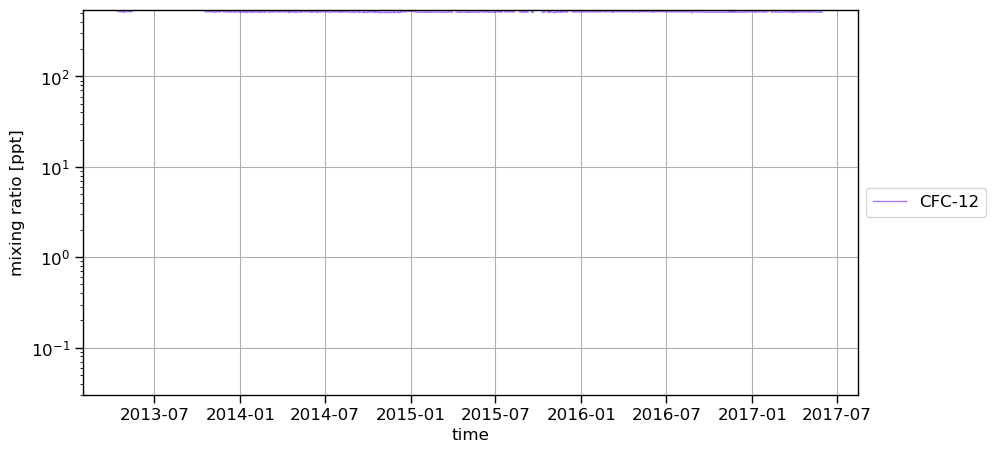

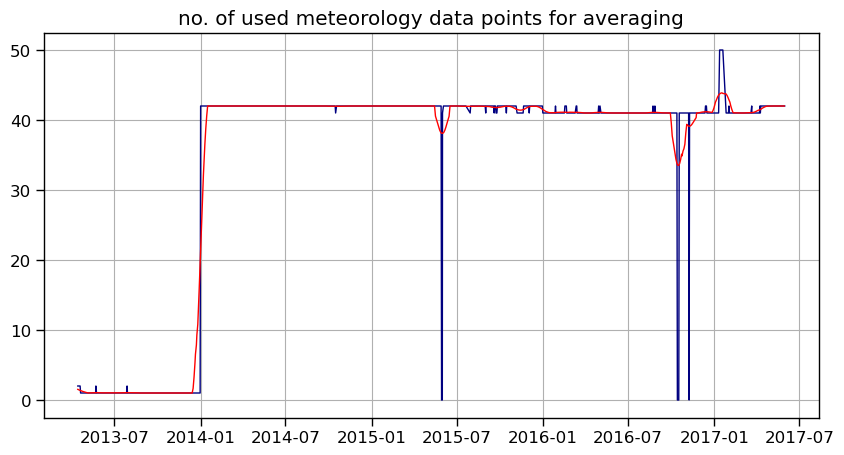

In [4]:
""" Plotting timeseries. """

#calculate moving averages
for i in [3,7,30]:
    data.calc_CMA(interval=i)

combinations = [
                    # (1,0,0,0,0), 
                    # (0,1,0,0,0), 
                    # (0,0,1,0,0), 
                    # (0,0,0,1,0), 
                    # (0,0,0,0,1), 
                    # (0,0,0,1,1), 
                    # (0,1,0,1,1), 
                    # (0,1,1,0,0), 
                    # (0,1,0,1,0), 
                    (0,1,0,0,1), 
               ]
        
data.plot_all_interesting_timeseries(combinations, plot_gases, plot_meteoprops, save=save)

In [ ]:
#plot them manually
for prop in classes.METEOCOLUMNS:
    frame = plt.subplots(num=prop)
    # data.plot(prop, label=None) #if plot only "daily"
    # data.plot(prop)
    # data.plot(prop, df_name="3-day", zorder=2)
    # data.plot(prop, df_name="7-day", zorder=3)
    data.plot(prop, df_name="30-day", zorder=4)
    pu.fig_ax_setup(frame, xlabel=xlabel, ylabel=prop+" [%s]"%data._properties.unit[prop])
    if save:
        labelss = frame[1].get_legend_handles_labels()[1]
        labels = [label[:label.find("y")+1] for label in labelss]
        directory = data._folder+"+".join(labels)+"/"
        pu.save_figure(frame, out+"timelines/"+directory+prop+".png", dpi=DPI)
        print("Saved %s."%prop)

In [ ]:
#calculate descriptive statistics
data.calc_stats(basic_stats=(1,1), slope_stats=(1,1))

In [ ]:
#save dataset
data.save_dataset()